In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

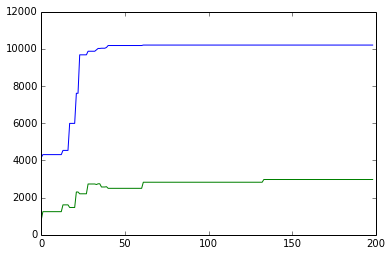

In [11]:
INSTRUMENT = 'SANDP-500'
FREQUENCY = '1hour'
res = np.fromfile('results/results_' + INSTRUMENT + '_' + FREQUENCY + '.txt',dtype = np.float32)
res = res.reshape(res.shape[0]/2,2) 
plt.plot(res)

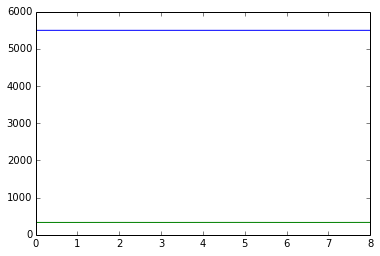

In [7]:
INSTRUMENT = 'AAPL'
FREQUENCY = '1hour'
res_ens = np.fromfile('results/results_ensemble_' + INSTRUMENT + '_' + FREQUENCY + '.txt',dtype = np.float32)
res_ens = res_ens.reshape(res_ens.shape[0]/2,2) 
plt.plot(res_ens)

In [23]:
PATH = 'data/'
INSTRUMENT = 'US2.AAPL'
DAY_START = '150129'
DAY_END = '160129'
filename = PATH + INSTRUMENT + '_' + DAY_START + '_' + DAY_END + '.txt'

In [11]:
filename

'days/US2.AAPL_150129_160129.txt'

In [14]:
data=np.genfromtxt('features/' + INSTRUMENT + '_' + DAY_START + '_' + DAY_END + '_features.txt', delimiter=',')

In [24]:
data = pd.read_csv(filename)
del data['<TICKER>']
del data['<PER>'] 
del data['<DATE>'] 
del data['<TIME>'] 

data.columns = ['open','high','low','close','vol']
size = data.shape[0]

In [25]:
data

,open,high,low,close,vol
0,116.330,116.430,116.190,116.280,47984
1,116.290,116.380,116.010,116.080,48833
2,116.090,116.120,115.850,115.980,62568
3,115.990,116.630,115.950,116.620,53294
4,116.630,116.660,116.250,116.260,44106
5,116.210,116.450,116.190,116.450,43979
6,116.450,116.560,116.260,116.270,50674
7,116.270,116.300,115.990,116.030,49444
8,116.050,116.180,115.970,116.040,37057
9,116.030,116.150,116.020,116.140,40146


In [68]:
%%timeit
data['vol'][1000]

The slowest run took 22.11 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 5.97 µs per loop


In [99]:
data.close[30:40]

30    116.80
31    116.90
32    117.11
33    117.18
34    117.19
35    117.21
36    116.98
37    117.21
38    117.22
39    117.09
Name: close, dtype: float64

In [30]:
from collections import Counter,deque

def calc_features():
    periods = [10,60]

    prices = [deque([]) for i in xrange(len(periods))]
    sum_prices = [0.0 for i in xrange(len(periods))]
    highs = [Counter({}) for i in xrange(len(periods))]
    lows = [Counter({}) for i in xrange(len(periods))]
    
    for p in periods:
        data['PROC_'+str(p)] = 0.0 #price rate of change
        data['VROC_'+str(p)] = 0.0 #volume rate of change
        data['MOM_'+str(p)] = 0.0 #momentum
        data['ABT_'+str(p)] = 0.0 #acceleration between times
        data['OBV_'+str(p)] = 0.0 #on balance volume
        data['NATR_'+str(p)] = 0.0 #normalized average true range
        
        #oscillators
        
        data['STOCH_'+str(p)] = 0.0 #stochastics
        data['F%K_'+str(p)] = 0.0 #fast stochastics
        data['S%K_'+str(p)] = 0.0 #slow stochastics
        data['S%D_'+str(p)] = 0.0 #slow slow stochastics
        
        data['EPV_' + str(p)] = 0.0 #ex-post volatility
        data['B%_'+str(p)] = 0.0 #bollinger bands percent
        data['BWIDTH_'+str(p)] = 0.0 #bollinger bands bandwidth
        data['WILLR_'+str(p)] = 0.0 #williams r
        
        #help values
        data['TR_'+str(p)] = 0.0 #true range
        
        
    data['PVT'] = 0.0 #price volume trend
    data['ADL'] = 0.0 #accumulated disitribution
    data['ADO'] = 0.0 #accumulated disitribution oscillator
    data['PPO'] = 0.0 #percent price oscillator
    data['MACD'] = 0.0 #moving average convergence-divergence


    for i in xrange(size): 
        if i%1000==0:
            print i
        smas = np.zeros((len(periods),),dtype=np.float32)
        for j in xrange(len(periods)):
            
            t = periods[j]
            s = str(t)
            
            close = data.close[i]
            close_prev = 0.0
            if i>=1:
                close_prev = data.close[i-1]         
            open = data.open[i]
            high = data.high[i]
            low = data.low[i]
            vol = data.vol[i]
            
            sma = np.mean(data.close[i-t:i+1])
            smas[j]=sma
            std = np.std(data.close[i-t:i+1])
            highest_high = np.max(data.high[i-t:i+1])
            lowest_low = np.min(data.low[i-t:i+1])
            
            data['TR_'+s][i] = np.max([high - low, high - close_prev, close_prev - low])
            if i>=t:
                
                data['PROC_'+s][i] = ((data.close[i-t] - close) / close) * 100
                data['VROC_'+s][i] = ((data.vol[i-t] - vol) / vol) * 100
                data['MOM_'+s][i] = data.close[i-t] - close          
                data['ABT_'+s][i] = data['MOM_'+s][i-t] - data['MOM_'+s][i]
                data['NATR_'+s][i] = np.mean(data['TR_' + s][i-t:i+1]) / close
                
                data['WILLR_'+s][i] = -100*((highest_high - close) / (highest_high - lowest_low))

                data['OBV_'+s][i] = data['OBV_'+s][i-1] + vol * np.sign(close - close_prev)
                
                data['STOCH_'+s][i] = ((close - lowest_low) / (highest_high - lowest_low))*100
                data['F%K_'+s][i] = np.mean(data['STOCH_'+s][i-t:i+1])
                data['S%K_'+s][i] = np.mean(data['F%K_'+s][i-3:i+1])
                data['S%D_'+s][i] = np.mean(data['S%K_'+s][i-3:i+1])
                
                data['EPV_'+s][i] = std / np.sqrt(t)
                
                middle_band = sma
                upper_band = middle_band + 2*std
                lower_band = middle_band - 2*std 
            
                data['B%_'+s][i] = (close - lower_band) / (upper_band - lower_band)
                data['BWIDTH_'+s][i] = upper_band - lower_band

        if i >= 1:
            data['PVT'][i] = data['PVT'][i-1] + vol * ((close - close_prev) / close_prev) 

        data['ADL'][i] += vol * ((close - low) - (high - close)) / (high - low)
        data['ADO'][i] += 100 * ((high - open) - (close - low)) / ((high - low) * 2)
        data['PPO'][i] = ((smas[0] - smas[1]) / smas[1]) * 100
        data['MACD'][i] = smas[0] - smas[1]
        
    print data.mean(axis=0)

In [17]:
for i in xrange(data.shape[1]):
    print np.mean(data[:,i])

-30649.6162522
110.728997732
-0.677389587171
0.755723524876
0.117669336194
0.00228505239874
46.3003155136
0.00202535798575
2.36540476468e-05
0.000805447648883
-48.9613681954
23168219.6793
51.0280443088
51.0238504562
51.0226237651
51.0214866192
396.54299073
0.499946868596
5015.91616352
0.013898933938
62.9732899508
0.0125613576471
6.97450442918e-05
0.000803829129933
-48.906225128
22785536.1763
51.0302725261
51.0053810686
51.0042682326
51.0031742813
933.369940754
0.499682264195
28919.4098911
0.0567110361637
93.379478343
0.0519972588822
0.00377221205033
0.000801935377354
-48.5062936807
22590848.6051
51.2397024693
51.1217408977
51.1202668799
51.1187936537
1852.07021156
0.498729744949
114768.593366
114768.593366


In [31]:
calc_features()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
open             119.574486
high             119.617778
low              119.528586
close            119.573499
vol             9782.749225
PROC_10            0.002285
VROC_10           -3.196207
MOM_10             0.002025
ABT_10             0.000024
OBV_10      -1627984.678220
NATR_10            0.000805
STOCH_10          51.028046
F%K_10            51.023853
S%K_10            51.022626
S%D_10            51.021489
EPV_10             0.02

In [29]:
close

NameError: name 'close' is not defined

In [210]:
import cProfile
cProfile.run('calc_features()')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
         174079891 function calls (173323995 primitive calls) in 198.967 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1   12.741   12.741  198.967  198.967 <ipython-input-209-e9c7325ea576>:3(calc_features)
        1    0.000    0.000  198.967  198.967 <string>:1(<module>)
   188974    0.153    0.000    0.255    0.000 __init__.py:119(iteritems)
   377948    0.367    0

In [19]:
matrix = data.as_matrix()
matrix = np.array(matrix, dtype=np.float32)

filename_out = 'features/' + INSTRUMENT + '_' + DAY_START + '_' + DAY_END + '.txt'
matrix.tofile(filename_out)

In [21]:
arr=np.fromfile(filename_out)
arr.shape

(1889740,)

(array([  7.82350000e+04,   1.33420000e+04,   1.65800000e+03,
          5.44000000e+02,   2.65000000e+02,   1.33000000e+02,
          1.02000000e+02,   5.60000000e+01,   4.70000000e+01,
          3.20000000e+01,   2.50000000e+01,   9.00000000e+00,
          8.00000000e+00,   4.00000000e+00,   4.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

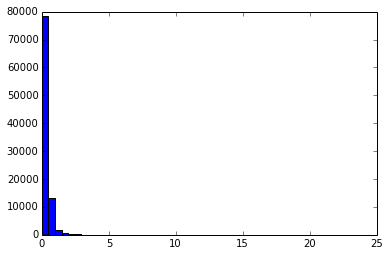

In [184]:
plt.hist(data['BWIDTH_10'],50)

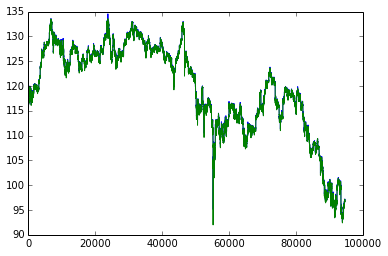

In [118]:
plt.plot(data.high)
plt.plot(data.low)
#plt.plot(data.SMA_60)